In [4]:
# fit the U.S. Covid-19 growth
# define and data input
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate as tb
import datetime as dt
from sympy import symbols, E
y = np.array([53,57,59,60,66,71,91,109,130,161,236,336,452,573,751,1041,1288,1712,2279,2971,3682,4663,6471,9286])
y.size
x = np.arange(y.size)
fitres = np.polyfit(x, np.log(y), 1,w=np.sqrt(y))
fitres

array([0.26682244, 2.92389114])

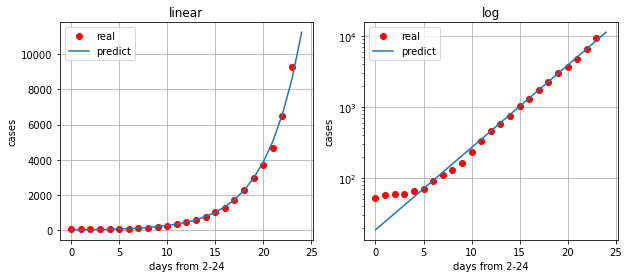

In [5]:
#plot section
plt.figure(figsize=(10,4))
plt.subplot(121)
t = np.arange(y.size+1)
q = np.exp(fitres[0]*t)*np.exp(fitres[1])
line_real, = plt.plot(x,y,'ro',label = 'real')
line_predict, = plt.plot(t,q,label = 'predict')
plt.xlabel('days from 2-24')
plt.ylabel('cases')
plt.legend(handles=[line_real, line_predict])
plt.grid()
plt.title('linear')
plt.subplot(122)
t = np.arange(y.size+1)
q = np.exp(fitres[0]*t)*np.exp(fitres[1])
line_real, = plt.plot(x,y,'ro',label = 'real')
line_predict, = plt.plot(t,q,label = 'predict')
plt.xlabel('days from 2-24')
plt.ylabel('cases')
plt.yscale('log')
plt.legend(handles=[line_real, line_predict])
plt.grid()
plt.title('log')
plt.show()

In [6]:
tp = np.zeros((y.size+10,3))
for i in range(y.size+10):
    tp[i,0] = i
    tp[i,2] = int(np.exp(fitres[0]*i)*np.exp(fitres[1]))
    if i < y.size:
        tp[i,1] = y[i]
        
tpp=tp.tolist()

for i in range(y.size+10):
    tpp[i][0] = (dt.date(2020,2,24)+dt.timedelta(days = i)).isoformat()
print(tb(tpp, headers=['days', 'Total cases','fit'],tablefmt='orgtbl'))

| days       |   Total cases |    fit |
|------------+---------------+--------|
| 2020-02-24 |            53 |     18 |
| 2020-02-25 |            57 |     24 |
| 2020-02-26 |            59 |     31 |
| 2020-02-27 |            60 |     41 |
| 2020-02-28 |            66 |     54 |
| 2020-02-29 |            71 |     70 |
| 2020-03-01 |            91 |     92 |
| 2020-03-02 |           109 |    120 |
| 2020-03-03 |           130 |    157 |
| 2020-03-04 |           161 |    205 |
| 2020-03-05 |           236 |    268 |
| 2020-03-06 |           336 |    350 |
| 2020-03-07 |           452 |    457 |
| 2020-03-08 |           573 |    597 |
| 2020-03-09 |           751 |    780 |
| 2020-03-10 |          1041 |   1018 |
| 2020-03-11 |          1288 |   1330 |
| 2020-03-12 |          1712 |   1736 |
| 2020-03-13 |          2279 |   2268 |
| 2020-03-14 |          2971 |   2961 |
| 2020-03-15 |          3682 |   3867 |
| 2020-03-16 |          4663 |   5050 |
| 2020-03-17 |          6471 |   6594 |


In [7]:
q = np.exp(fitres[0]*(t-2))*np.exp(fitres[1])
q

array([  12.55524599,   16.2699987 ,   21.08384477,   27.32197578,
         35.40579855,   45.8814026 ,   59.45645039,   77.04798225,
         99.84436557,  129.38557306,  167.66721308,  217.27533971,
        281.56114948,  364.86736601,  472.82160563,  612.71654189,
        794.00255029, 1028.92611308, 1333.3571105 , 1727.86088478,
       2239.08749849, 2901.5720363 ])